# Setup Spark

In [1]:
cd/content/drive/MyDrive/spark

/content/drive/MyDrive/spark


In [2]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq
!wget -q https://dlcdn.apache.org/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
!tar xf spark-3.3.0-bin-hadoop3.tgz
!pip install -q findspark
!pip install pyspark


Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [87.8 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,905 kB]
Hit:

In [3]:
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/drive/MyDrive/spark/spark-3.3.0-bin-hadoop3"

import findspark
findspark.init()
findspark.find()


'/content/drive/MyDrive/spark/spark-3.3.0-bin-hadoop3'

In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("StockMarket")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

PermissionError: ignored

In [6]:
spark

Create public URL for the UI page for Spark UI

In [7]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip


--2022-07-31 09:40:36--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 18.205.222.128, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  16.0MB/s    in 0.8s    

2022-07-31 09:40:37 (16.0 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [8]:
!./ngrok authtoken 2CdF7gVNlyMHcpH9wMymZ6OANI8_6ijVA8o4TiZUyvbFH9KKx

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [17]:
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels | python3 -c   "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.7/json/__init__.py", line 296, in load
    parse_constant=parse_constant, object_pairs_hook=object_pairs_hook, **kw)
  File "/usr/lib/python3.7/json/__init__.py", line 348, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.7/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.7/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


In [19]:
get_ipython().system_raw('./ngrok http 4050 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://c5dd-34-125-6-6.ngrok.io


# Dataset Exploration

In [111]:
df_aapl = spark.read.csv("/content/drive/MyDrive/techcombank-stock-price-prediction/AAPL.csv",header=True, inferSchema=True)

In [92]:
type(df_tcb)

pyspark.sql.dataframe.DataFrame

In [66]:
df_aapl.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: long (nullable = true)



In [67]:
df_tcb.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Vol.: string (nullable = true)
 |-- Change %: string (nullable = true)



In [68]:
df_aapl.show()

+-------------------+--------+--------+--------+--------+---------+----------+
|               Date|    Open|    High|     Low|   Close|Adj Close|    Volume|
+-------------------+--------+--------+--------+--------+---------+----------+
|2000-01-03 00:00:00|0.936384|1.004464|0.907924|0.999442| 0.854541| 535796800|
|2000-01-04 00:00:00|0.966518|0.987723| 0.90346|0.915179| 0.782494| 512377600|
|2000-01-05 00:00:00|0.926339|0.987165|0.919643|0.928571| 0.793945| 778321600|
|2000-01-06 00:00:00|0.947545|0.955357|0.848214|0.848214| 0.725238| 767972800|
|2000-01-07 00:00:00|0.861607|0.901786|0.852679|0.888393| 0.759592| 460734400|
|2000-01-10 00:00:00|0.910714|0.912946|0.845982|0.872768| 0.746232| 505064000|
|2000-01-11 00:00:00|0.856585|0.887277|0.808036|0.828125| 0.708062| 441548800|
|2000-01-12 00:00:00|0.848214|0.852679|0.772321| 0.77846| 0.665597| 976068800|
|2000-01-13 00:00:00| 0.84361|0.881696|0.825893|0.863839| 0.738598|1032684800|
|2000-01-14 00:00:00|0.892857|0.912946|0.887277|0.89

In [58]:
df_tcb.show()

+------------+--------+--------+--------+--------+------+--------+
|        Date|   Price|    Open|    High|     Low|  Vol.|Change %|
+------------+--------+--------+--------+--------+------+--------+
|Jul 28, 2022|37,300.0|36,600.0|37,500.0|36,600.0| 5.42M|   1.91%|
|Jul 27, 2022|36,600.0|36,500.0|36,800.0|36,350.0| 1.49M|   0.00%|
|Jul 26, 2022|36,600.0|36,800.0|39,000.0|36,400.0| 2.79M|  -0.54%|
|Jul 25, 2022|36,800.0|37,100.0|37,100.0|34,550.0| 2.34M|  -0.81%|
|Jul 22, 2022|37,100.0|36,900.0|37,850.0|36,900.0| 4.42M|   0.68%|
|Jul 21, 2022|36,850.0|36,300.0|36,900.0|36,000.0| 5.49M|   1.52%|
|Jul 20, 2022|36,300.0|36,700.0|36,700.0|35,000.0| 4.92M|   0.55%|
|Jul 19, 2022|36,100.0|36,300.0|36,300.0|35,750.0| 2.57M|  -0.55%|
|Jul 18, 2022|36,300.0|37,500.0|37,500.0|36,000.0| 2.99M|   0.55%|
|Jul 15, 2022|36,100.0|35,900.0|38,400.0|35,900.0| 4.09M|   0.42%|
|Jul 14, 2022|35,950.0|35,600.0|36,300.0|35,600.0| 2.90M|  -0.42%|
|Jul 13, 2022|36,100.0|36,150.0|36,800.0|36,000.0| 3.16M|   0.

In [69]:
df_aapl.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+--------------------+
|summary|              Open|              High|               Low|             Close|         Adj Close|              Volume|
+-------+------------------+------------------+------------------+------------------+------------------+--------------------+
|  count|              5679|              5679|              5679|              5679|              5679|                5679|
|   mean|27.655528886599782| 27.96333620250042|27.351974223806995| 27.67022892181725|26.546330152491617| 4.206504023208311E8|
| stddev| 40.17574060418408|40.662065532700915| 39.70804718079798|40.207648284507734| 40.12057575133881|3.8801818393992686E8|
|    min|          0.231964|          0.235536|          0.227143|          0.234286|          0.200319|            39340000|
|    max|        182.630005|        182.940002|        179.119995|        182.009995|        181.511703|          7421

In [70]:
df_tcb.describe().show()

+-------+------------+--------+--------+--------+--------+-------+--------+
|summary|        Date|   Price|    Open|    High|     Low|   Vol.|Change %|
+-------+------------+--------+--------+--------+--------+-------+--------+
|  count|        1040|    1040|    1040|    1040|    1040|   1040|    1040|
|   mean|        null|    null|    null|    null|    null|   null|    null|
| stddev|        null|    null|    null|    null|    null|   null|    null|
|    min|Apr 01, 2019|14,900.0|15,000.0|15,500.0|14,000.0|  1.00M|  -0.10%|
|    max|Sep 30, 2021|58,000.0|57,800.0|58,600.0|55,600.0|995.42K|   6.96%|
+-------+------------+--------+--------+--------+--------+-------+--------+



In [179]:
import pyspark.sql.functions as f
df_aapl = df_aapl.withColumn("date", f.to_date('Date'))

In [180]:
df_aapl.show()

+----------+--------+--------+--------+--------+---------+----------+
|      date|    Open|    High|     Low|   Close|Adj Close|    Volume|
+----------+--------+--------+--------+--------+---------+----------+
|2000-01-03|0.936384|1.004464|0.907924|0.999442| 0.854541| 535796800|
|2000-01-04|0.966518|0.987723| 0.90346|0.915179| 0.782494| 512377600|
|2000-01-05|0.926339|0.987165|0.919643|0.928571| 0.793945| 778321600|
|2000-01-06|0.947545|0.955357|0.848214|0.848214| 0.725238| 767972800|
|2000-01-07|0.861607|0.901786|0.852679|0.888393| 0.759592| 460734400|
|2000-01-10|0.910714|0.912946|0.845982|0.872768| 0.746232| 505064000|
|2000-01-11|0.856585|0.887277|0.808036|0.828125| 0.708062| 441548800|
|2000-01-12|0.848214|0.852679|0.772321| 0.77846| 0.665597| 976068800|
|2000-01-13| 0.84361|0.881696|0.825893|0.863839| 0.738598|1032684800|
|2000-01-14|0.892857|0.912946|0.887277|0.896763| 0.766748| 390376000|
|2000-01-18|0.901786|0.946429|0.896763|0.928013| 0.793468| 459177600|
|2000-01-19| 0.94308

In [181]:
date_breakdown = ['year', 'month', 'day']
for i in enumerate(date_breakdown):
    index = i[0]
    print(index)
    name = i[1]
    print(name)
    df_aapl = df_aapl.withColumn(name, f.split('date', '-')[index])

0
year
1
month
2
day


In [182]:
df_aapl.show(5)

+----------+--------+--------+--------+--------+---------+---------+----+-----+---+
|      date|    Open|    High|     Low|   Close|Adj Close|   Volume|year|month|day|
+----------+--------+--------+--------+--------+---------+---------+----+-----+---+
|2000-01-03|0.936384|1.004464|0.907924|0.999442| 0.854541|535796800|2000|   01| 03|
|2000-01-04|0.966518|0.987723| 0.90346|0.915179| 0.782494|512377600|2000|   01| 04|
|2000-01-05|0.926339|0.987165|0.919643|0.928571| 0.793945|778321600|2000|   01| 05|
|2000-01-06|0.947545|0.955357|0.848214|0.848214| 0.725238|767972800|2000|   01| 06|
|2000-01-07|0.861607|0.901786|0.852679|0.888393| 0.759592|460734400|2000|   01| 07|
+----------+--------+--------+--------+--------+---------+---------+----+-----+---+
only showing top 5 rows



In [183]:
df_aapl_plot = df_aapl.select('year', 'Close').toPandas()

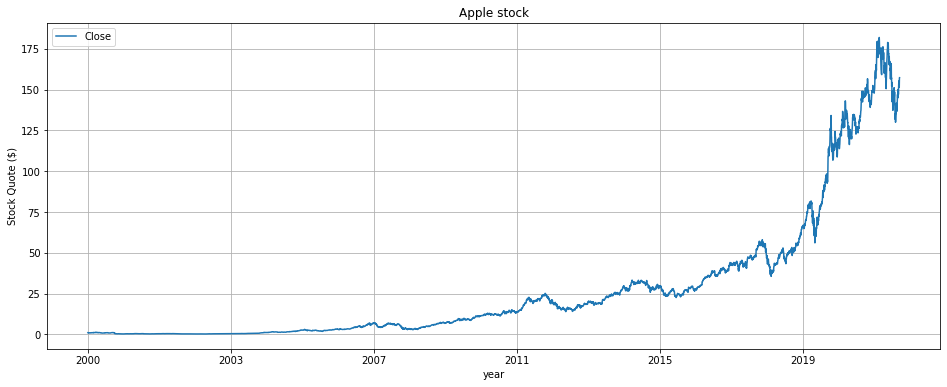

In [184]:
from matplotlib import pyplot as plt
%matplotlib inline

df_aapl_plot.set_index('year', inplace=True)
df_aapl_plot.plot(figsize=(16, 6), grid=True)
plt.title('Apple stock')
plt.ylabel('Stock Quote ($)')
plt.show()

## With TCB

PySpark Data Frame: https://builtin.com/data-science/pyspark-dataframe

In [160]:
df_tcb = spark.read.csv("/content/drive/MyDrive/techcombank-stock-price-prediction/TCB Historical Data.csv",header=True, inferSchema=True)

In [161]:
df_tcb.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Vol.: string (nullable = true)
 |-- Change %: string (nullable = true)



In [162]:
from pyspark.sql.types import *

In [163]:
df_tcb1 = df_tcb.withColumn("Price", f.col("Price").cast(
  DoubleType()))

In [165]:
df_tcb.show(5)

+------------+--------+--------+--------+--------+-----+--------+
|        Date|   Price|    Open|    High|     Low| Vol.|Change %|
+------------+--------+--------+--------+--------+-----+--------+
|Jul 28, 2022|37,300.0|36,600.0|37,500.0|36,600.0|5.42M|   1.91%|
|Jul 27, 2022|36,600.0|36,500.0|36,800.0|36,350.0|1.49M|   0.00%|
|Jul 26, 2022|36,600.0|36,800.0|39,000.0|36,400.0|2.79M|  -0.54%|
|Jul 25, 2022|36,800.0|37,100.0|37,100.0|34,550.0|2.34M|  -0.81%|
|Jul 22, 2022|37,100.0|36,900.0|37,850.0|36,900.0|4.42M|   0.68%|
+------------+--------+--------+--------+--------+-----+--------+
only showing top 5 rows



In [156]:
price1 = "37,300.0"
price1.replace(",", ".").replace(".0", "")

'37.300'

In [172]:
df_tcb_pd = df_tcb.toPandas()
df_tcb_pd

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jul 28, 2022","37,300.0","36,600.0","37,500.0","36,600.0",5.42M,1.91%
1,"Jul 27, 2022","36,600.0","36,500.0","36,800.0","36,350.0",1.49M,0.00%
2,"Jul 26, 2022","36,600.0","36,800.0","39,000.0","36,400.0",2.79M,-0.54%
3,"Jul 25, 2022","36,800.0","37,100.0","37,100.0","34,550.0",2.34M,-0.81%
4,"Jul 22, 2022","37,100.0","36,900.0","37,850.0","36,900.0",4.42M,0.68%
...,...,...,...,...,...,...,...
1035,"Jun 11, 2018","36,333.0","34,933.0","36,333.0","34,400.0",3.69M,3.61%
1036,"Jun 08, 2018","35,067.0","33,667.0","35,067.0","33,167.0",6.03M,6.91%
1037,"Jun 07, 2018","32,800.0","31,500.0","32,800.0","31,033.0",4.13M,6.96%
1038,"Jun 06, 2018","30,667.0","31,667.0","32,000.0","30,333.0",4.82M,-4.17%


In [176]:
df_tcb_pd.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

# Preparing data

In [185]:
df_aapl.toPandas().shape

(5679, 10)

In [186]:
df_aapl.dropna().count()

5679

In [187]:
df_aapl.select('Open', "High", 'Low', 'Close', 'Adj Close').describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+
|summary|              Open|              High|               Low|             Close|         Adj Close|
+-------+------------------+------------------+------------------+------------------+------------------+
|  count|              5679|              5679|              5679|              5679|              5679|
|   mean|27.655528886599782| 27.96333620250042|27.351974223806995| 27.67022892181725|26.546330152491617|
| stddev| 40.17574060418408|40.662065532700915| 39.70804718079798|40.207648284507734| 40.12057575133881|
|    min|          0.231964|          0.235536|          0.227143|          0.234286|          0.200319|
|    max|        182.630005|        182.940002|        179.119995|        182.009995|        181.511703|
+-------+------------------+------------------+------------------+------------------+------------------+



1. Group the year column by `Adj Close` count:

In [188]:
df_aapl.groupBy(['year']).agg({'Adj Close':'count'})\
     .withColumnRenamed('count(Adj Close)', 'Row Count')\
     .orderBy(["year"],ascending=False)\
     .show()

+----+---------+
|year|Row Count|
+----+---------+
|2022|      143|
|2021|      252|
|2020|      253|
|2019|      252|
|2018|      251|
|2017|      251|
|2016|      252|
|2015|      252|
|2014|      252|
|2013|      252|
|2012|      250|
|2011|      252|
|2010|      252|
|2009|      252|
|2008|      253|
|2007|      251|
|2006|      251|
|2005|      252|
|2004|      252|
|2003|      252|
+----+---------+
only showing top 20 rows



2. Create new dataframes for training and test purposes:

Use all of the stock quotes from 2000 through 2016 to predict stock trends in 2017-2022



In [189]:
train_df_aapl = df_aapl[df_aapl.year < 2017]
test_df_aapl = df_aapl[df_aapl.year > 2016]

3. Get row and column counts of 2 data frames

In [192]:
print(train_df_aapl.toPandas().shape)
test_df_aapl.toPandas().shape

(4277, 10)


(1402, 10)

4. Visualizes `train_df_aapl` and `test_df_aapl`

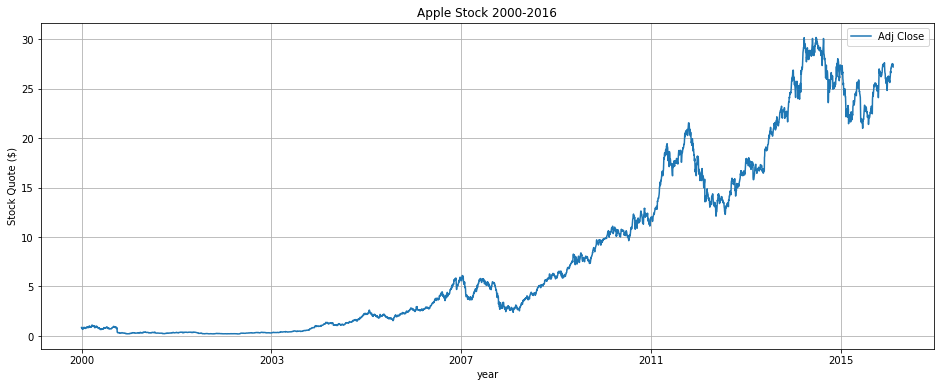

In [193]:
train_df_aapl_plot = train_df_aapl.select('year', 'Adj Close').toPandas()
train_df_aapl_plot.set_index('year', inplace=True)
train_df_aapl_plot.plot(figsize=(16, 6), grid=True)
plt.title('Apple Stock 2000-2016')
plt.ylabel('Stock Quote ($)')
plt.show()

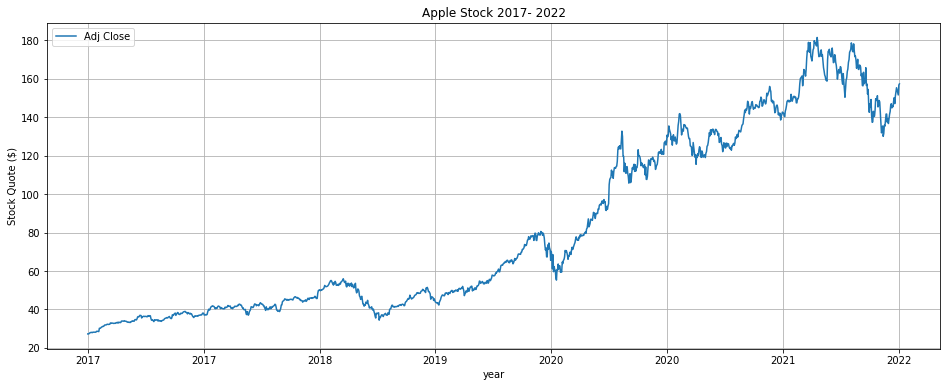

In [194]:
test_df_aapl_plot = test_df_aapl.select('year', 'Adj Close').toPandas()
test_df_aapl_plot.set_index('year', inplace=True)
test_df_aapl_plot.plot(figsize=(16, 6), grid=True)
plt.title('Apple Stock 2017- 2022')
plt.ylabel('Stock Quote ($)')
plt.show()

5. Create 2 arrays: train_array, test_array

In [195]:
trainDF = train_df_aapl
testDF = test_df_aapl

In [196]:
import numpy as np
trainArray = np.array(trainDF.select('Open', 'High', 'Low',                     'Close','Volume', 'Adj Close' ).collect())
testArray = np.array(testDF.select('Open', 'High', 'Low', 'Close','Volume',     'Adj Close' ).collect())

6. Scale the arrays between 0 and 1

In [197]:
from sklearn.preprocessing import MinMaxScaler
minMaxScale = MinMaxScaler()

In [198]:
minMaxScale.fit(trainArray)

testingArray = minMaxScale.transform(testArray)
trainingArray = minMaxScale.transform(trainArray)

In [199]:
xtrain = trainingArray[:, 0:-1]
xtest = testingArray[:, 0:-1]
ytrain = trainingArray[:, -1:]
ytest = testingArray[:, -1:]

In [200]:
print('xtrain shape = {}'.format(xtrain.shape))
print('xtest shape = {}'.format(xtest.shape))
print('ytrain shape = {}'.format(ytrain.shape))
print('ytest shape = {}'.format(ytest.shape))

xtrain shape = (4277, 5)
xtest shape = (1402, 5)
ytrain shape = (4277, 1)
ytest shape = (1402, 1)


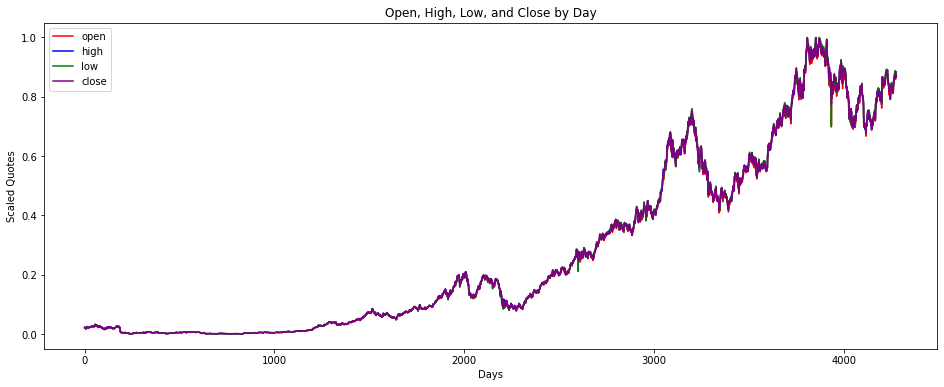

In [201]:
plt.figure(figsize=(16,6))
plt.plot(xtrain[:,0],color='red', label='open')
plt.plot(xtrain[:,1],color='blue', label='high')
plt.plot(xtrain[:,2],color='green', label='low')
plt.plot(xtrain[:,3],color='purple', label='close')
plt.legend(loc = 'upper left')
plt.title('Open, High, Low, and Close by Day')
plt.xlabel('Days')
plt.ylabel('Scaled Quotes')
plt.show()

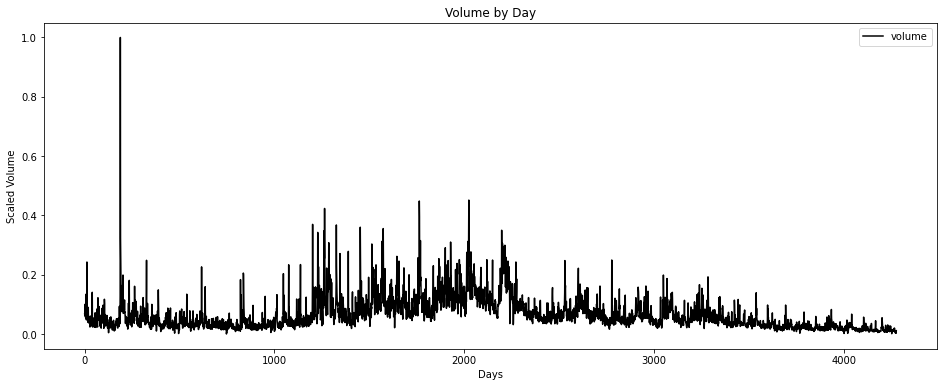

In [202]:
plt.figure(figsize=(16,6))
plt.plot(xtrain[:,4],color='black', label='volume')
plt.legend(loc = 'upper right')
plt.title('Volume by Day')
plt.xlabel('Days')
plt.ylabel('Scaled Volume')
plt.show()

# Building LSTM model

In [204]:
from keras import models, layers

In [205]:
model = models.Sequential()
model.add(layers.LSTM(1, input_shape=(1,5)))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [206]:
xtrain = xtrain.reshape((xtrain.shape[0], 1, xtrain.shape[1]))
xtest = xtest.reshape((xtest.shape[0], 1, xtest.shape[1]))

In [ ]:
loss = model.fit(xtrain, ytrain, batch_size=10, epochs=100)

Epoch 1/100
428/428 [==============================] - 7s 3ms/step - loss: 0.0862
Epoch 2/100
428/428 [==============================] - 1s 3ms/step - loss: 0.0096
Epoch 3/100
428/428 [==============================] - 1s 3ms/step - loss: 7.4305e-04
Epoch 4/100
428/428 [==============================] - 1s 3ms/step - loss: 5.2710e-04
Epoch 5/100
428/428 [==============================] - 1s 3ms/step - loss: 4.6963e-04
Epoch 6/100
428/428 [==============================] - 1s 3ms/step - loss: 4.2546e-04
Epoch 7/100
428/428 [==============================] - 1s 3ms/step - loss: 3.9161e-04
Epoch 8/100
428/428 [==============================] - 1s 3ms/step - loss: 3.6523e-04
Epoch 9/100
428/428 [==============================] - 1s 3ms/step - loss: 3.4545e-04
Epoch 10/100
428/428 [==============================] - 1s 3ms/step - loss: 3.2722e-04
Epoch 11/100
428/428 [==============================] - 3s 6ms/step - loss: 3.1201e-04
Epoch 12/100
428/428 [==============================] - 2s 5